## Lending Club Peer-to-Peer Loans

<img src= "Lc.png" width="600" />

<img src= "p2ploans.png" width="600" />

#### Author: Rahul Loney
#### Email: rl2838@nyu.edu

## Data Report and Relevant packages

Alternative Lending has majorly disrupted the Banking sector. People are swaying away from
traditional banking institutions and going to Peer-to-Peer lending companies that offer an easier,
less beaureacratic approach to acquiring loans.



Lending Club is the biggest P2P lending company with a market share of approximately 45%. The
aim of this project is to dig deeper into the default rates associated with Lending Club to gain a
better insight into what makes people default on their payments and what causes these factors to
be pronounced or mitigated in certain states.


I will be using the kaggle dataset that contains Lending CLub Loan Data from 2007-2015.
The loan dataset contains all the loans that are current, paid off or have been defaulted between the years of 2007-2015 and
can be found [here](https://www.kaggle.com/wendykan/lending-club-loan-data/data). It contains features regarding annual income, length of employment, grade and sub-grade of loan, amongst others. These features are very useful in trying to identify why people default on their loans, which is the primary aim of the project.

### Packages used
- `pandas` allows us to read in, manipulate and analyze data easily
- `numpy` helps in computations on a matrix algebra level
- `matplotlib` is the primary tool used for data visualization with a variety of figures
- `plotly` is a mapping tool that has matplotlibs core functionalities
- `sklearn` and all its functions will be the cornerstone for all statistical and machine learning applications of the project

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split
from sklearn import tree
import random


In [99]:
# First we download the csv file from kaggle with the link below
# The downloaded file is a zip file that contains the csv file called loan.csv 
download_link = 'https://www.kaggle.com/wendykan/lending-club-loan-data/data'

# We then use pandas read_csv method to read the downloaded csv into the dataframe called data
data = pd.read_csv('loan.csv', low_memory = False)

In [100]:
# Observe the shape of the dataset and its features to inspect the columns that will be necessary to explore loan defaults further
print(data.shape)
print((data.columns.tolist))

(887379, 74)
<bound method Index.tolist of Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dt

For the purpose of analysis there are a lot of columns that wont be needed. Hence, the trimmed dataframe will contain the following features we want to investigate

In [101]:
col_list = ['loan_status','loan_amnt','int_rate','funded_amnt','grade',
            'sub_grade','emp_length','annual_inc','home_ownership','addr_state']
data_1 = data[col_list]
data_1.head()

,loan_status,loan_amnt,int_rate,funded_amnt,grade,sub_grade,emp_length,annual_inc,home_ownership,addr_state
0,Fully Paid,5000.0,10.65,5000.0,B,B2,10+ years,24000.0,RENT,AZ
1,Charged Off,2500.0,15.27,2500.0,C,C4,< 1 year,30000.0,RENT,GA
2,Fully Paid,2400.0,15.96,2400.0,C,C5,10+ years,12252.0,RENT,IL
3,Fully Paid,10000.0,13.49,10000.0,C,C1,10+ years,49200.0,RENT,CA
4,Current,3000.0,12.69,3000.0,B,B5,1 year,80000.0,RENT,OR


In [102]:
data_1.dtypes

loan_status        object
loan_amnt         float64
int_rate          float64
funded_amnt       float64
grade              object
sub_grade          object
emp_length         object
annual_inc        float64
home_ownership     object
addr_state         object
dtype: object

As we can see in the trimmed dataframe, some of the values look troublesome. For example, the emp_length is displayed as strings which have to be converted into integers. After cleaning this dataframe we have the necessary information to perform the analysis outlined in the project proposal

# Data Cleaning
## Cleaning Loan Status Column
- We assign the various loan status strings to a number
- Charged Off, Late, Grace Period and Default loans are all considered Defaulted loans
- Fully Paid loans are considrered not defaulted and Current loans are assigned a value but of no relevance

In [103]:
#construct a dictionary to map each type of home ownership to a numerical value
status_dict = {'Current': 2, 'Fully Paid': 1, 'Charged Off':0, 'Late(31-120 days)':0, 
              'In Grace Period': 0, 'Late(16-30 days)': 0, 'Default': 0}

data_1['loan_status_clean'] = data_1['loan_status'].map(status_dict)


C:\Users\Rahul Loney\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [104]:
#dropping any n/a values and remove any current loans (Value:2)
data_1.dropna( axis = 0, how = 'any', inplace = True)

data_1 = data_1[data_1.loan_status_clean != 2.0]

data_1.loan_status_clean = data_1.loan_status_clean.astype(int)

data_1 = data_1.rename( columns = {"loan_status_clean":"Default"})

data_1.head(2)

C:\Users\Rahul Loney\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,loan_status,loan_amnt,int_rate,funded_amnt,grade,sub_grade,emp_length,annual_inc,home_ownership,addr_state,Default
0,Fully Paid,5000.0,10.65,5000.0,B,B2,10+ years,24000.0,RENT,AZ,1
1,Charged Off,2500.0,15.27,2500.0,C,C4,< 1 year,30000.0,RENT,GA,0


## Employment Length
- The employment length measures are listed as strings, we have to convert them to integers

In [105]:
#removing the string elements from employment status and convert the strings to integers
emp_list = ['years','year','<','+']
for i in emp_list:
    data_1['emp_length'] = data_1.emp_length.str.replace(i,'')

data_1['emp_length'] = data_1.emp_length.str.replace('n/a','0')

data_1['emp_length'] = data_1.emp_length.astype(int)

In [106]:
data_1.head(2)

,loan_status,loan_amnt,int_rate,funded_amnt,grade,sub_grade,emp_length,annual_inc,home_ownership,addr_state,Default
0,Fully Paid,5000.0,10.65,5000.0,B,B2,10,24000.0,RENT,AZ,1
1,Charged Off,2500.0,15.27,2500.0,C,C4,1,30000.0,RENT,GA,0


# Characterizing a typical borrower for P2P Loans
Before we start analyzing what causes default on Lending Club loans, we must try to characterize the consumer who is actually using lending club and compare them to an average U.S citizen who goes to banks and financial institutions to obtain loans. In order to do this, the following questions will be explored:
- What does a typical Lending Club borrower earn on average?
- What kind of home ownership status does he/she have?
- How long have they been employed?
- Compare all these statistics to US averages to attempt to characterize a typical borrower for P2P Loans

## Exploring distribution of income

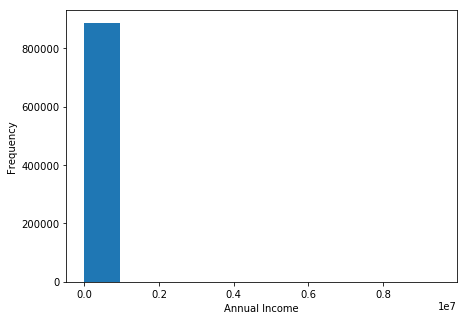

In [107]:
fig,ax = plt.subplots(figsize = (7,5))
data.annual_inc.plot(kind = 'hist', ax = ax)
ax.set_xlabel('Annual Income')
plt.show()

 We see that the income distribution data seems to be skewed due to the presence of extreme outliers


Due to this we cannot get a good visalisation of the income distribution. In order to see how many outliers we have, we use the following code

In [108]:
# We see that the income distribution data seems to be skewed and due to the presence of extreme outliers
# Due to this we cannot get a good visalisation of the income distribution
# In order to see how many outliers we have, we use the following code
outliers = data_1[data_1['annual_inc'] > 150000]
print('The number of outliers are', len(outliers))
print('The highest level of income is', outliers.annual_inc.max())

The number of outliers are 10920
The highest level of income is 8900060.0


#### Hence, looking at the histogram above, we will observe the distribution of income below $150,000 so that we account for the skewness caused by the outliers

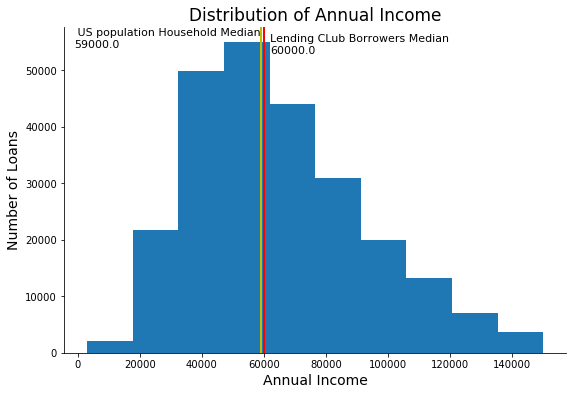

In [109]:
data_1 = data_1[data_1['annual_inc'] < 150000]

median = data_1.annual_inc.median()

fig,ax = plt.subplots(figsize = (9,6))
data_1.annual_inc.plot(kind = 'hist', ax = ax)

ax.axvline(x= median,           
           color='r',       
           label='Average', 
           linestyle='-',   
           linewidth=2)     

message = "Lending CLub Borrowers Median \n" + str(round(median,-1)) 
                                                  
                                                  
ax.text(median + 2000, 
        53000,
        message,
        horizontalalignment='left', fontsize = 11) 

ax.axvline(x= 59000,          
           color='y',       
           label='US Median', 
           linestyle='-',   
           linewidth=2)    

message = " US population Household Median \n" + str(round(59000.0,-1)) 
                                         
                                                  
ax.text(-1000, 
        54000, 
        message,
        horizontalalignment='left', fontsize = 11) 

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Annual Income", fontsize = 14)
ax.set_ylabel("Number of Loans", fontsize = 14)
ax.set_title("Distribution of Annual Income", fontsize = 17)

plt.show()

#### From this we see that the median income of a typical borrower on Lending Club is almost similar to the average U.S citizen ($59,000) implying that the consumer borrowing on Lending Club have a similar annual income to a US citizen who borrows from a bank

## Comparing with US Averages

In order to make comparisons with US median household income we make the assumption that the borrowers income on Lending Club represents a household
- The table below shows how the median income, average years employed and % of population who rent their homes, of Lending Club borrowers compare to the United States Average

In [110]:
avg_emp = data_1.emp_length.mean()
pct_rent = (data_1.home_ownership.value_counts()[1]/data_1.home_ownership.value_counts().sum())*100
index = ['Median Income', 'Average years employed', '% of rent']
compare = pd.DataFrame({"Lending Club":[round(median,-1),avg_emp,pct_rent],"United States":[59000, 4.6, 37],
                       "Index":['Median Income', 'Average years employed', '% of renters']})
compare.set_index('Index')

,Lending Club,United States
Index,,
Median Income,60000.000000,59000.0
Average years employed,5.669064,4.6
% of renters,42.980443,37.0


*Data on United Status population sourced from US Census bereau data

#### From the table above we get a superficial, but important insight about the profile of an average Lending Club borrower as compared to the general United States population
- We can clearly see that they have very similar characteristics and we can infer that an individual who goes on Lending CLub to borrow money is similar to one who goes to a bank for a loan
- Given that the consumer profile is similar to that of an average American bank account holder, we can now look at the typical loan default causes and see how they impact Defaults on Lending club

### How does the number of defaults change with different kinds of home owners?

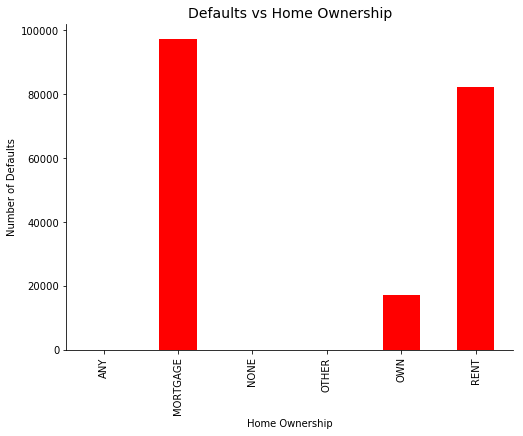

In [111]:
fig, ax = plt.subplots(figsize = (8,6))

grouped = data_1.groupby (["home_ownership"]).sum()
grouped.Default.plot( kind = "bar", color ="r")

ax.set_xlabel("Home Ownership")
ax.set_ylabel("Number of Defaults")
ax.set_title("Defaults vs Home Ownership", fontsize = 14)

ax.spines["right"].set_visible(False)

ax.spines["top"].set_visible(False)

plt.show()

#### We notice that the individuals who have a house on rent and mortgage seem to be defaulting the most as compared to people who own a house

### How does Defaults vary across various Loan Grades and Interest rate
- Lending club assigns loan grades that vary with interest rate i.e A has the least interest rate while G has the highest
- This interest rate is the sum of Lending Clubs base rate (5.05%) and the adjusted risk and volatility of the loan

In [112]:

# Getting average interest rate per loan for each grade
interest = []

for i in sorted(list(data_1.grade.unique())):
    rate = data_1[data_1['grade']== i].int_rate.mean()
    interest.append(rate)

# Getting average interest rate per loan for each sub grade
sub_grades = ['B1', 'B2', 'B3', 'B4', 'B5']
interest_1=[]    

for i in sub_grades:
    x = data_1[data_1['sub_grade'] == i].int_rate.mean()
    interest_1.append(x)

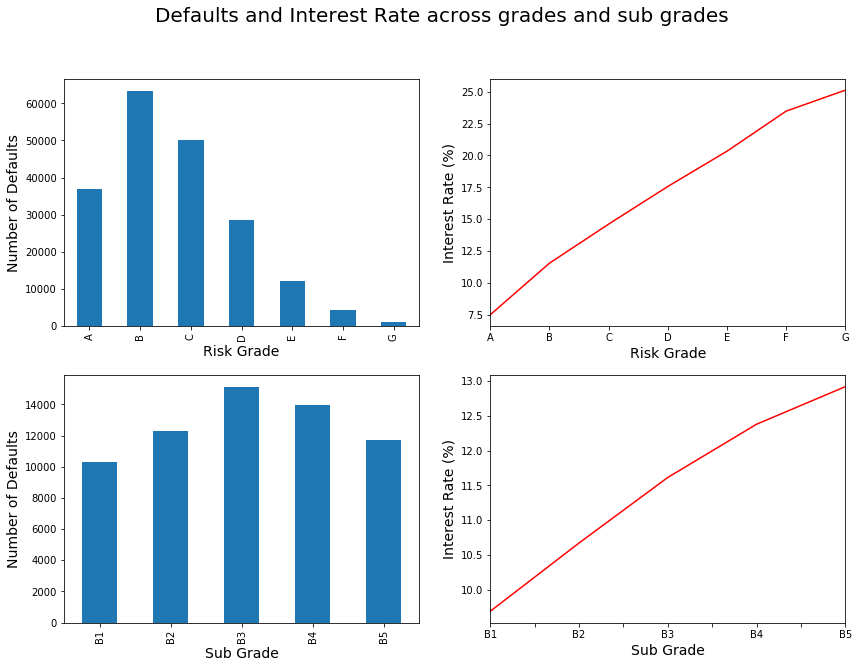

In [113]:
#Group by the loan grade 
grouped = data_1.groupby (["grade"]).sum()
grouped['Avg_int'] = interest

grouped_1 = data_1.groupby(['sub_grade']).sum().iloc[5:10]
grouped_1['Avg_int'] = interest_1

    
fig,ax = plt.subplots(2,2, figsize = (14,10))    # Create matplotlib figure

grouped.Default.plot( ax = ax[0][0], kind = "bar")
grouped.Avg_int.plot( ax = ax[0][1], kind = "line", color = "r")
grouped_1.Default.plot( ax = ax[1][0], kind = "bar")
grouped_1.Avg_int.plot(ax = ax[1][1], kind = 'line', color = "r")

ax[0][0].set_ylabel("Number of Defaults", fontsize = 14)
ax[0][0].set_xlabel("Risk Grade", fontsize = 14)

ax[1][0].set_ylabel("Number of Defaults", fontsize = 14)
ax[1][0].set_xlabel("Sub Grade", fontsize = 14)

ax[1][1].set_ylabel("Interest Rate (%)", fontsize = 14)
ax[1][1].set_xlabel("Sub Grade", fontsize = 14)

ax[0][1].set_ylabel("Interest Rate (%)", fontsize = 14)
ax[0][1].set_xlabel("Risk Grade", fontsize = 14)

plt.suptitle('Defaults and Interest Rate across grades and sub grades', fontsize = 20)

plt.show()

- Interestingly, we see that B grade loans have the most number of defaults across all loan grades. This is striking as it would seem that the riskier loan with the highest interest rate are not the loans that get defaulted on the most. Similarly, within the grade B, the subgrade B3 has the highest number of defaults but does not have the highest interest rate
- However, this also occurs because there are relatively less high risk loans available and hence the sample size of each loan grade is varied

## Annual Income and Funded Amount

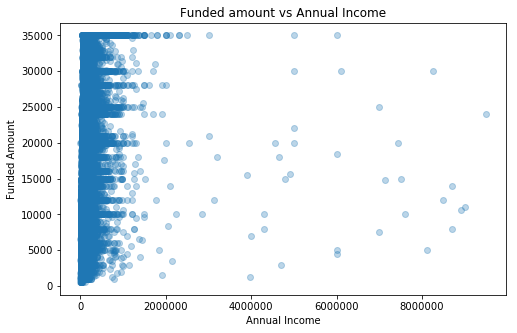

In [114]:
fig,ax = plt.subplots(figsize = (8,5))

ax.scatter((data.annual_inc),(data.funded_amnt),
          alpha = 0.3)

ax.set_title("Funded amount vs Annual Income")

ax.set_xlabel("Annual Income")

ax.set_ylabel("Funded Amount")
ax.set_xticks([0,2000000,4000000,6000000,8000000])
plt.show()

- We notice that most of the loans on Lending Club are done by low annual income individuals
- However, the loan amount has the same density throughout which implies that all types of loans are asked for by the low annual income borrowers

### State-wise Default in the United States

- Using plotly we can create a basemap of the Unites States and map the amount of defaults per state to see which state defaults the most 

In [ ]:
import plotly.plotly as py
import plotly

#create list of states
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", 
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", 
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", 
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#colour scale for relative number of defaults
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#create dictionary for the data input that will be plotted on the map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = pd.Series(states),
        z = data_1.groupby('addr_state').sum().Default,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Defaults")
        ) ]
layout = dict(
        title = 'Number of Loans Defaulted',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
import plotly

plotly.offline.plot(fig)

<img src= "newplot.png" width="750" />

#### We notice that the state of California (CA) has the highest amount of defaults through the years 2007-2015

## Logistic Regression
- Now that we have a better understanding of what a loan default on Lending Club actually means and the financial background of the borrowers on Lending Club, we can try to regress the features on defaults to try and measure their isolated causal impact 
- We notice that our dependant variable (Default) is a binary varible, and we cannot run an ordinary regression for a binary dependant variable.
- Hence, we run a logistic regression which gives us the causal effect of select features on our dependant variable (Default)

In [115]:
# Creating binary dummy variables for Rent, Mortgage, Own, Other and None
home_ownership = pd.get_dummies(data_1.home_ownership)
data_1 = data_1.join(home_ownership)

In [116]:
# Last look at data before regression
data_1.head(5)

,loan_status,loan_amnt,int_rate,funded_amnt,grade,sub_grade,emp_length,annual_inc,home_ownership,addr_state,Default,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,Fully Paid,5000.0,10.65,5000.0,B,B2,10,24000.0,RENT,AZ,1,0,0,0,0,0,1
1,Charged Off,2500.0,15.27,2500.0,C,C4,1,30000.0,RENT,GA,0,0,0,0,0,0,1
2,Fully Paid,2400.0,15.96,2400.0,C,C5,10,12252.0,RENT,IL,1,0,0,0,0,0,1
3,Fully Paid,10000.0,13.49,10000.0,C,C1,10,49200.0,RENT,CA,1,0,0,0,0,0,1
5,Fully Paid,5000.0,7.90,5000.0,A,A4,3,36000.0,RENT,AZ,1,0,0,0,0,0,1


In [117]:
data_1['grade'] = data_1['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

X_Variables = ['loan_amnt','annual_inc','grade','RENT', 'MORTGAGE', 'OWN',]
X = data_1[X_Variables]

X = X.values
y = data_1['Default'].values

clf = linear_model.LogisticRegression()
model = clf.fit(X,y)


df = pd.DataFrame(model.coef_.T)
df['Index'] = X_Variables

df = df.set_index('Index')
df

,0
Index,
loan_amnt,-3.700838e-05
annual_inc,2.784872e-05
grade,5.297227e-08
RENT,2.412714e-09
MORTGAGE,2.069809e-09
OWN,7.970586e-10


- The coefficients for all the variables are almost close to zero. This does not mean that the features have no explanatory power over the Default of a loan.


#### These estimates could be caused due to a number of reasons:
- We get these imprecise estimates because the variables we selected are highly correlated with each other i.e if a person has a high income, he probably will own a house and will be employed for longer.
- This introduces the issue of multicollinearity in our regression which gives us imprecise estimates
- We must isolate uncorrelated features and regress them individually to see the individual causal impact

### Impact of Home ownership

In [118]:
X_Variables = ['RENT', 'MORTGAGE', 'OWN','NONE','OTHER']
X = data_1[X_Variables]

X = X.values
y = data_1['Default'].values

clf = linear_model.LogisticRegression()
model = clf.fit(X,y)

print(model.score(X, y))

df = pd.DataFrame(model.coef_.T)
df['Index'] = X_Variables

df = df.set_index('Index')
df

0.794900598028


,0
Index,
RENT,0.072524
MORTGAGE,0.330135
OWN,0.160335
NONE,0.332427
OTHER,0.228957


#### From our beta estimates, we can see that a home ownership status of mortgage and none has the highest causual impact on Default on a Lending Club loan 

### Impact of annual income and loan grade

In [119]:
X_Variables = ['annual_inc','grade']

X = data_1[X_Variables]


X = X.values
y = data_1['Default'].values

clf = linear_model.LogisticRegression()
model = clf.fit(X,y)

print(model.score(X, y))

df = pd.DataFrame(model.coef_.T)
df['Index'] = X_Variables

df = df.set_index('Index')
df

0.794900598028


,0
Index,
annual_inc,0.000020
grade,0.000017


- The estimates are low as the annual income is in the 10000-150000 scale which affect the causal relationship with our binary variable and intern affects the explaining power of the other independant variable (loan grade)
- To correct this, we can run the same regression with log(annual income) and then get a better understanding of our estimates

### Corrected regression for annual income and loan grade

In [120]:
data_1['log_inc'] = np.log(data_1.annual_inc)
X_Variables = ['log_inc','grade']

X = data_1[X_Variables]


X = X.values
y = data_1['Default'].values

clf = linear_model.LogisticRegression()
model = clf.fit(X,y)

print(model.score(X, y))

df = pd.DataFrame(model.coef_.T)
df['Index'] = X_Variables

df = df.set_index('Index')
df

0.793587360595


,0
Index,
log_inc,0.447504
grade,0.429305


- The corrected regression produces estimates that demonstrates explaining power over the number of defaults
- For each 1 unit increase in grade and log income, the probability of default increases by around 40%

## Historical Default Prediction with Machine Learning

- Now that we have established that our selected features have a causal impact on loans being defaulted, we can build a model and train it to predict whether a laon with given parameters has been defaulted on or paid off
- We first build a decision tree model 
- Then apply the random forest classification in order to randomize the sample
- We then split the data into a training and testing set by which we fit our model
- Predict values of default with our test data set and then compare it to the actual data values to see the accuracy of prediction

In [91]:
def create_decisiontree(i):
    features = ['annual_inc','loan_amnt','grade']
    y = data_1.iloc[i:i+10]["Default"]
    X = data_1.iloc[i:i+10][features]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X,y)
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

### Decision Trees
- A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences

We created 3 different decision trees with three different samples to get an idea of how the algorithm works

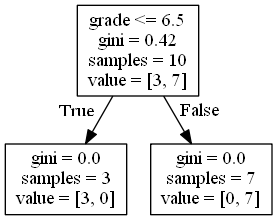

In [32]:
# we generate a random number and then take a 10 row sample to see how the decision tree works to set up the prediction model

i = random.randrange(1,len(data_1))

create_decisiontree(i)

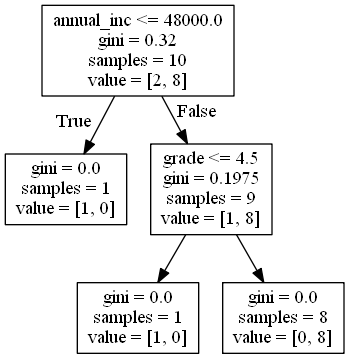

In [33]:
i = random.randrange(1,len(data_1))

create_decisiontree(i)

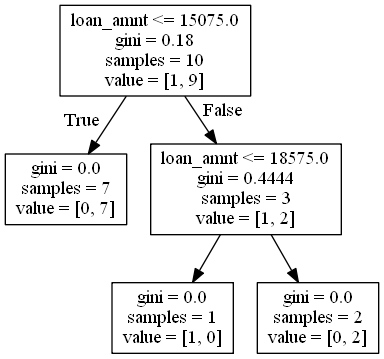

In [36]:
i = random.randrange(1,len(data_1))

create_decisiontree(i)

#### Reading the Trees:
- Each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "Paid off" and 5 "Defaults" by the time we get to that point. value = [3. 0.] means 3 paid off loans and 0 defaults.


#### These trees show us intuitively how the machine learning model is going to run through the data and make decisions based of the features that affect the default of a lending club loan

### Random Forests
- Now we use a machine learning model called random forest that basically iterates through n different decision trees and creates a model that we can predict from
- First, we split the dataset into a training set and testing set (usually 80:20 split) using scikit learns inbuilt functions
- Then we use random forests to train our training data and fit it to a model
- Finally, we use the model on the testing data and see the accuracy with which it predicts the true value outcome in the dataset

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_1)
y = train["Default"]
X = train[['annual_inc','loan_amnt','grade','RENT', 'MORTGAGE', 'OWN','NONE','OTHER']]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)



### Using the model fitted on the training data to predict default for given values of annual income, loan grade, loan amount and home ownership

In [96]:
predicted_vals = []
for i in range(len(test)):
    x = int(clf.predict([[test.annual_inc.iloc[i],test.loan_amnt.iloc[i],test.grade.iloc[i],
              test['RENT'].iloc[i], test['MORTGAGE'].iloc[i], test['OWN'].iloc[i],
              test['NONE'].iloc[i],test['OTHER'].iloc[i]]]))
    predicted_vals.append(x)

In [41]:
success = 0
for i in range(len(test)):
    if predicted_vals[i] == test.Default.iloc[i]:
        success +=1
    else:
        continue
accuracy = (success/len(test))*100
print('The accuracy of the given prediction model is', round(accuracy,1),'%')

The accuracy of the given prediction model is 74.5 %


## Future Roadmap
- Model a probability function that predicts the probability that a current loan will default using the same training technique used above
- Stacking 3 machine learning models and weighting them objectively to get a better accuracy output

## Summary
- Peer-to-Peer lending might be disruptive in nature due to its ease of access and marketplace lending, however the factors that lead to default seem to be strikingly similar to defaults on bank loans
- The default of a loan depends on a multitude of factors, but the factors explored in this project seem to exhibit credible explaining power
- Training and testing on the data set and predicting defaults yields an accuracy of 75% which fits the data set well as a preliminary step of machine learning analysis

## References
- US Census Bureau 
- Data Science, Deep Learning and Machine Learning with python (Online Course by Jose Portilla)